## Importing Libraries

In [24]:
'''
Numpy : used for multidimensional array and matrices
Pandas: used for read and write operation on .csv files
matplotlib : used for ploting curves and graphs
seaborn : used for data visualization
'''
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Data loading and Inspection


In [4]:
df = pd.DataFrame(pd.read_csv("Housing_1.csv"))

In [5]:
# df.head() ---> prints top 5 entries
# df.tail() ---> prints last 5 entries
print(df.tail())

       price    area  bedrooms  bathrooms  stories mainroad guestroom  \
540  1820000  3000.0         2        1.0        1      yes        no   
541  1767150  2400.0         3        1.0        1       no        no   
542  1750000  3620.0         2        1.0        1      yes        no   
543  1750000  2910.0         3        1.0        1       no        no   
544  1750000  3850.0         3        1.0        2      yes        no   

    basement hotwaterheating airconditioning  parking prefarea  \
540      yes              no              no        2       no   
541       no              no              no        0       no   
542       no              no              no        0       no   
543       no              no              no        0       no   
544       no              no              no        0       no   

    furnishingstatus  
540      unfurnished  
541   semi-furnished  
542      unfurnished  
543        furnished  
544      unfurnished  


In [6]:
print(df.shape)
print(df.info())

(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              542 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         539 non-null    float64
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         544 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   544 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  542 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 55.5+ KB
None


In [7]:
# checking for the Nan/ null values
df.isnull().sum() 

price               0
area                3
bedrooms            0
bathrooms           6
stories             0
mainroad            0
guestroom           1
basement            0
hotwaterheating     1
airconditioning     0
parking             0
prefarea            0
furnishingstatus    3
dtype: int64

In [8]:
# going through every column(parameters) of data and checking for discrete data type

for key in df.keys():
    if key == 'price' or key == 'area':
        continue
    else:
        print("Unique Values for {}: {}".format(key, df[key].unique()))

Unique Values for bedrooms: [4 3 5 2 6 1]
Unique Values for bathrooms: [ 2.  4.  1.  3. nan]
Unique Values for stories: [3 4 2 1]
Unique Values for mainroad: ['yes' 'no']
Unique Values for guestroom: [nan 'no' 'yes']
Unique Values for basement: ['no' 'yes']
Unique Values for hotwaterheating: ['no' 'yes' nan]
Unique Values for airconditioning: ['yes' 'no']
Unique Values for parking: [2 3 0 1]
Unique Values for prefarea: ['yes' 'no']
Unique Values for furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished' nan]


In [9]:
'''
price               0
area                3
bedrooms            0
bathrooms           6
stories             0
mainroad            0
guestroom           1
basement            0
hotwaterheating     1
airconditioning     0
parking             0
prefarea            0
furnishingstatus    3
'''

# Analysis mean for continuous variables and mode for discrete type variables

mean_area = df['area'].mean()
print("Mean area : {}".format(mean_area))
print("Mode of Bathrooms:{}".format(df['bathrooms'].mode()[0]))
print("Mode of guestroom:{}".format(df['guestroom'].mode()[0]))
print("Mode of hotwaterheating:{}".format(df['hotwaterheating'].mode()[0]))
print("Mode of furnishingstatus:{}".format(df['furnishingstatus'].mode()[0]))

Mean area : 5136.9095940959405
Mode of Bathrooms:1.0
Mode of guestroom:no
Mode of hotwaterheating:no
Mode of furnishingstatus:semi-furnished


In [10]:
# Since the dataset is small in size, we can not drop any row, each and every information is useful in small datasets
# replacing continuous value with the mean value
# replacing discrete value with the mode value

df['area'] = df['area'].replace(to_replace =  np.nan,  
                            value = df['area'].mean()) 
df['bathrooms'] = df['bathrooms'].replace(to_replace=np.nan, value = df['bathrooms'].mode()[0])
df['guestroom'] = df['guestroom'].replace(to_replace=np.nan, value = df['guestroom'].mode()[0])
df['hotwaterheating'] = df['hotwaterheating'].replace(to_replace=np.nan, value=df['hotwaterheating'].mode()[0])
df['furnishingstatus'] = df['furnishingstatus'].replace(to_replace=np.nan, value = df['furnishingstatus'].mode()[0])

In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Outlier Analysis Using Boxplots


#### Outlier are the points that are far away from the most of the points in the data distribution. These can degrade the performance of the linear regression model, so these are very important to remove

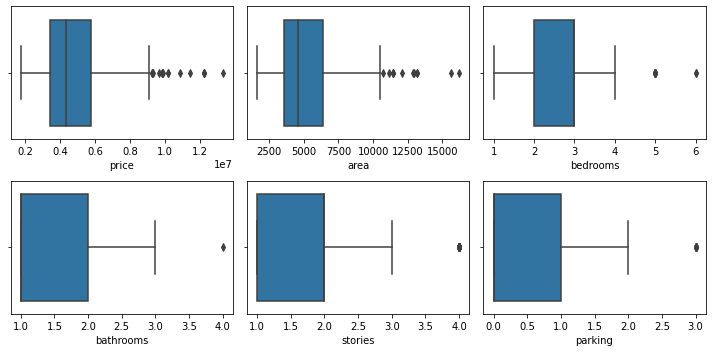

In [ ]:
# outlier analysis

fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0][0])
plt2 = sns.boxplot(df['area'], ax = axs[0][1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0][2])
plt4 = sns.boxplot(df['bathrooms'], ax = axs[1][0])
plt5 = sns.boxplot(df['stories'], ax = axs[1][1])
plt6 = sns.boxplot(df['parking'], ax = axs[1][2])

plt.tight_layout()

In [12]:
# outlier removal for price
print(df['price'].describe())
print(df['area'].describe())

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64
count      545.000000
mean      5136.909594
std       2160.938974
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64


9205000.0
(15, 13)


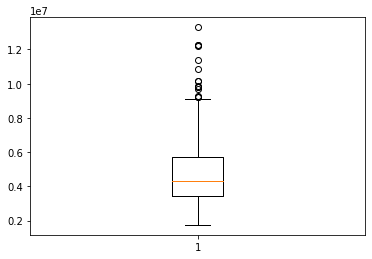

In [13]:
# Removing outliers for price
plt.boxplot(df['price'])
Q3 = df.price.quantile(0.75)
Q1 = df.price.quantile(0.25)
IQR = Q3-Q1
print(Q3+1.5*IQR)
print(df[df['price'] > Q3+1.5*IQR].shape)
df.drop(df[df['price'] > Q3+1.5*IQR].index, axis = 0, inplace = True)

10305.0
(14, 13)


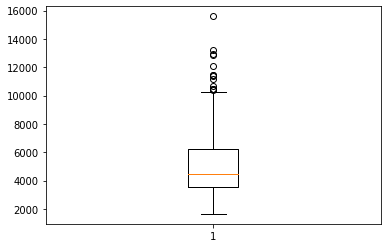

In [14]:
# Removing outliers for area
plt.boxplot(df.area)
Q3 = df['area'].quantile(0.75)
Q1 = df['area'].quantile(0.25)
IQR = Q3-Q1
print(Q3+1.5*IQR)
print(df[df['area']>Q3+1.5*IQR].shape)
df.drop(df[df['area'] > Q3+1.5*IQR].index, axis = 0, inplace = True)

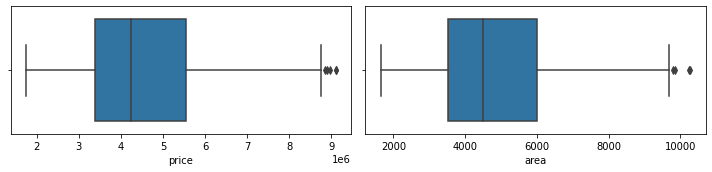

In [15]:
fig, axs = plt.subplots(1,2, figsize = (10,2.5))
plt1 = sns.boxplot(df['price'], ax = axs[0])
plt2 = sns.boxplot(df['area'], ax = axs[1])

plt.tight_layout()

***Finding Effect of different parameters on Price***

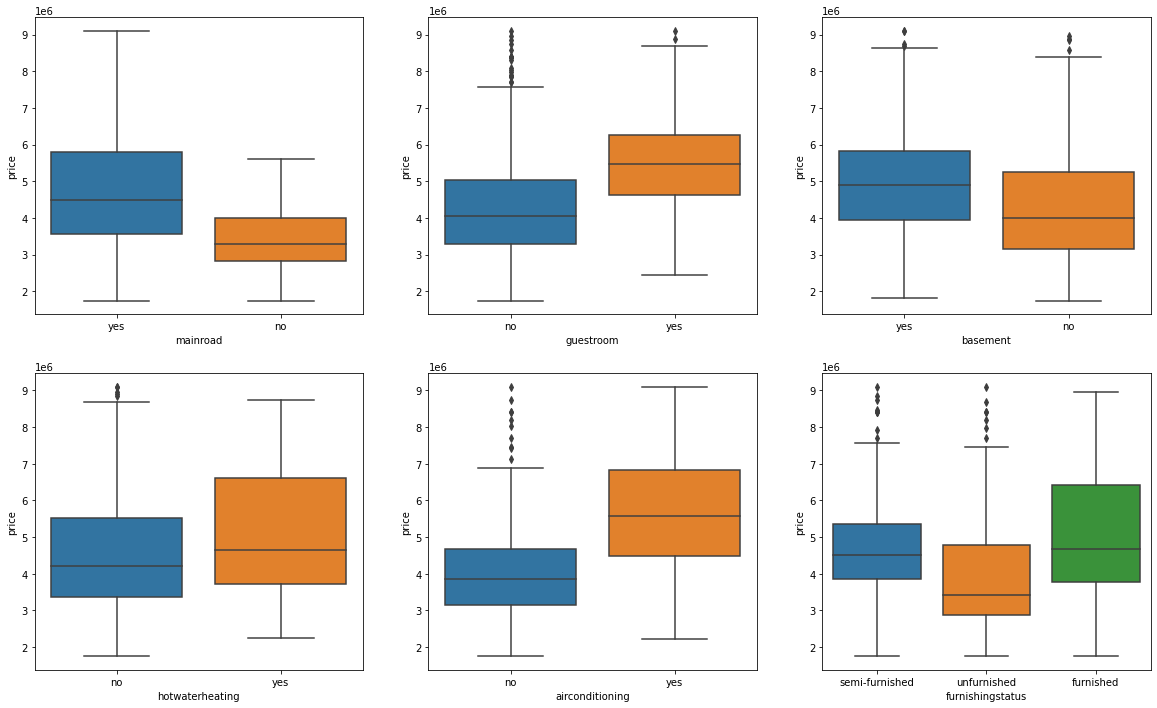

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()


In [17]:
'''
mainroad            0
guestroom           1
basement            0
hotwaterheating     1
airconditioning     0
prefarea            0
'''
# Model only takes the numerical values, so it is important to convert the categorical variables to numeric values
# mapping Categorical features to binary
features_to_map = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def mapper(x):
    return x.map({'yes':1, 'no':0})

df[features_to_map] = df[features_to_map].apply(mapper)

In [18]:
status = pd.get_dummies(df['furnishingstatus'])
print(status.head())
print("Semi-Furnished Count:{}".format(status[status['semi-furnished']==1].shape[0]))
print("Furnished Count : {}".format(status[status['furnished']==1].shape[0]))
print("Unfurnished Count:{}".format(status[status['unfurnished']==1].shape[0]))

    furnished  semi-furnished  unfurnished
15          0               1            0
16          0               0            1
17          1               0            0
18          1               0            0
19          0               1            0
Semi-Furnished Count:215
Furnished Count : 126
Unfurnished Count:175


In [19]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
print(status.head())

    semi-furnished  unfurnished
15               1            0
16               0            1
17               0            0
18               0            0
19               1            0


In [20]:
# axis = 0 --> row
# axis = 1 --> column

df = pd.concat([df,status],axis=1)
print(df.head())

      price         area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000.000000         4        1.0        2         1          0   
16  9100000  6600.000000         4        2.0        2         1          1   
17  8960000  8500.000000         3        2.0        4         1          0   
18  8890000  4600.000000         3        2.0        2         1          1   
19  8855000  5136.909594         3        2.0        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0        2         0   
16         1                0                1        1         1   
17         0                0                1        2         0   
18         0                0                1        2         0   
19         0                0                1        1         1   

   furnishingstatus  semi-furnished  unfurnished  
15   semi-furnished               1            0  
16      

In [21]:
df.drop('furnishingstatus',axis=1,inplace = True)
print(df.head())

      price         area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000.000000         4        1.0        2         1          0   
16  9100000  6600.000000         4        2.0        2         1          1   
17  8960000  8500.000000         3        2.0        4         1          0   
18  8890000  4600.000000         3        2.0        2         1          1   
19  8855000  5136.909594         3        2.0        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0        2         0   
16         1                0                1        1         1   
17         0                0                1        2         0   
18         0                0                1        2         0   
19         0                0                1        1         1   

    semi-furnished  unfurnished  
15               1            0  
16               0            1  
17      

## Linear Regression model Building using Sklearn Library

In [23]:
# Splitting the dataset into train and test set

df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
print("Train Set Size:{}".format(df_train.shape))
print("Test Set Size:{}".format(df_test.shape))

Train Set Size:(412, 14)
Test Set Size:(104, 14)


***Normalization of parameters in data***

In [25]:
scaler = MinMaxScaler()
#print(df_train.head())
cols_to_transform = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[cols_to_transform] = scaler.fit_transform(df_train[cols_to_transform])
print(df_train.head())

/home/ayush/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


        price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
434  0.209524  0.244136       0.6        0.0  0.333333         1          0   
451  0.190476  0.589334       0.2        0.0  0.000000         1          0   
531  0.065714  0.420119       0.4        0.0  0.000000         0          0   
498  0.123810  0.035010       0.2        0.0  0.333333         1          0   
479  0.161905  0.228731       0.6        0.0  0.333333         0          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
434         0                0                0      0.0         0   
451         0                0                0      0.0         0   
531         0                0                1      0.0         1   
498         0                0                0      0.0         0   
479         0                0                0      0.0         0   

     semi-furnished  unfurnished  
434               1            0  
451               1            0  

/home/ayush/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [26]:
y_train = df_train.pop('price')
X_train = df_train
print(y_train.head())
print(X_train.head())


434    0.209524
451    0.190476
531    0.065714
498    0.123810
479    0.161905
Name: price, dtype: float64
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
434  0.244136       0.6        0.0  0.333333         1          0         0   
451  0.589334       0.2        0.0  0.000000         1          0         0   
531  0.420119       0.4        0.0  0.000000         0          0         0   
498  0.035010       0.2        0.0  0.333333         1          0         0   
479  0.228731       0.6        0.0  0.333333         0          0         0   

     hotwaterheating  airconditioning  parking  prefarea  semi-furnished  \
434                0                0      0.0         0               1   
451                0                0      0.0         0               1   
531                0                1      0.0         1               0   
498                0                0      0.0         0               1   
479                0                0

***Importing linear Regression Model from Sklearn***

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train) ##Train the model (Only one line for model training )

LinearRegression()

***Normalizing Testing Data***

In [28]:
df_test[cols_to_transform] = scaler.fit_transform(df_test[cols_to_transform])
print(df_test.head())

        price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
243  0.371981  0.122449  0.333333        0.0  0.333333         1          0   
515  0.082126  0.212245  0.333333        0.0  0.333333         1          0   
157  0.502415  0.158776  0.666667        0.5  0.333333         0          1   
262  0.357488  0.285714  0.000000        0.0  0.000000         1          1   
493  0.130435  0.314286  0.333333        0.0  0.000000         1          0   

     basement  hotwaterheating  airconditioning   parking  prefarea  \
243         1                0                0  0.000000         0   
515         1                0                0  0.000000         0   
157         1                0                0  0.333333         0   
262         1                0                0  0.000000         0   
493         0                0                0  0.000000         0   

     semi-furnished  unfurnished  
243               0            0  
515               0         

/home/ayush/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ayush/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [29]:
y_test = df_test.pop('price')
X_test = df_test

***Predicting on Testing Data using trained Model***

In [30]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

***Finding Error in Prediction***

In [31]:
from sklearn.metrics import mean_squared_error
print("Train Mean Square error : {:.4f}".format(mean_squared_error(y_pred_train,y_train)))
print("Test Mean Square error : {:.4f}".format(mean_squared_error(y_pred,y_test)))

Train Mean Square error : 0.0161
Test Mean Square error : 0.0169


In [32]:
scaler1 = MinMaxScaler()
scaler1.min_, scaler1.scale_ = scaler.min_[2], scaler.scale_[2]

In [33]:
y_pred = y_pred.reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
final_predictions = scaler1.inverse_transform(y_pred)
ground_truth = scaler1.inverse_transform(y_test)

In [34]:
print("Final Test Mean Square Error Score : {:.4f}".format(mean_squared_error(final_predictions,ground_truth)))

Final Test Mean Square Error Score : 0.0677


In [35]:
len(scaler.min_)

6

In [36]:
for i in range(6):
    scaler1 = MinMaxScaler()
    scaler1.min_, scaler1.scale_ = scaler.min_[i], scaler.scale_[i]
    y_pred = y_pred.reshape(-1,1)
    y_test = np.array(y_test).reshape(-1,1)
    final_predictions = scaler1.inverse_transform(y_pred)
    ground_truth = scaler1.inverse_transform(y_test)
    print("Final Test Mean Square Error Score : {:.4f}".format(mean_squared_error(final_predictions,ground_truth)))
    

Final Test Mean Square Error Score : 914909.5315
Final Test Mean Square Error Score : 0.1524
Final Test Mean Square Error Score : 0.0677
Final Test Mean Square Error Score : 0.1524
Final Test Mean Square Error Score : 0.1524
Final Test Mean Square Error Score : 888955975373.2775


***Building Liner regression model without sklearn(Normal Code)***

In [51]:
class Regressor:
    
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self,X,y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        print("Shape of X : {}".format(X.shape))
        print("Shape of Weights : {}".format(self.weights.shape))
        for _ in range(self.n_iters):
            
            y_predicted = np.dot(X,self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted-y)
            self.weights =  self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
      
    def predict(self,X):
        y_predicted = np.dot(X,self.weights) + self.bias
        return y_predicted

In [52]:
print("Shape of X_train:{}".format(X_train.shape))
print("Shape of y_train:{}".format(y_train.shape))
print("Shape of X_test:{}".format(X_test.shape))
print("Shape of y_test:{}".format(y_test.shape))

Shape of X_train:(412, 13)
Shape of y_train:(412,)
Shape of X_test:(104, 13)
Shape of y_test:(104, 1)


In [53]:
regressor = Regressor()

In [54]:
regressor.fit(X_train,y_train)

Shape of X : (412, 13)
Shape of Weights : (13,)


In [56]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
print("Train Mean Square error : {:.4f}".format(mean_squared_error(y_pred_train,y_train)))
print("Test Mean Square error : {:.4f}".format(mean_squared_error(y_pred,y_test)))

Train Mean Square error : 0.0271
Test Mean Square error : 0.0327


In [ ]:
'''
X.shape = (100, 10)
w.shape = (10,1)
y.shape = (100,1) -------------> (100,10) X (10, 1) = (100,1)


(3x2)   (2x1)
[1,2] x  [a]  =  [1*a + 2*b]
[4,5]    [b]     [4*a + 5*b]
[7,8]            [7*a + 8*b] 

y_pred = sum(xi*wi) // summation 
y_pred = np.dot(X,w) // vectorized
'''

